# Causal Inference
## Задание CI.1


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---


**Баллы за задание:**

* Задача 1 — 70 баллов
* Задача 2 — 70 баллов
* Задача 3 — 30 баллов
* Задача 4 — 40 баллов

In [132]:
# Bot check

# HW_ID: ds_ci1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [133]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as sps
import matplotlib.pyplot as plt
import networkx as nx
import graphviz as gr
from dowhy import gcm
import seaborn as sns

---

### Задача 1.

*Задача простая, расписана подробно, помогает разобраться в разных деталях.*

При проведении испытания лекарства получены следующие данные. В каждом случае указано количество успешных случаев.


| Количество успешных        | Принимали плацебо | Принимали лекарство  |
| :------------- |-------------:| -----:|
| Низкое давление      | 81 из 87 | 234 из 270 |
| Высокое давление     | 192 из 263      |   55 из 80 |


Требуется оценить эффект влияния лекарства на успех в двух следующих случаях.

* Кровяное давление пациентов измерялось до начала испытания, после чего принималось решение о приеме лекарства.

* Кровяное давление пациентов измерялось в конце испытания. При этом известно, что лекарство может оказывать эффект на кровяное давление, которое в свою очередь может оказывать эффект на выздоровление. 

Часть этой задачи мы уже разобрали на занятии. Сейчас давайте на ее примере разберемся досконально в разных тонкостях.

**1.** Выполните следующие действия для каждого случая.


- Нарисуйте граф причинно-следственных связей для каждого случая. 
- Выпишите плотность марковского распределения на графе.
- Определите численно оценку каждой компоненты плотности. Все распределения дискретны, поэтому надо указать оценки всех необходимых условных вероятностей.

*T = treatment (принимали лекарство), H = high pressure (высокое давление), S = success (успех\выздоровление)*

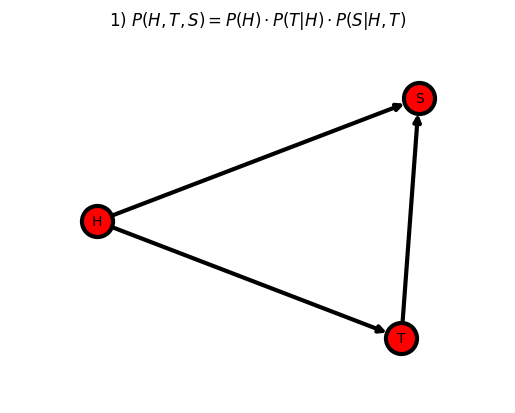

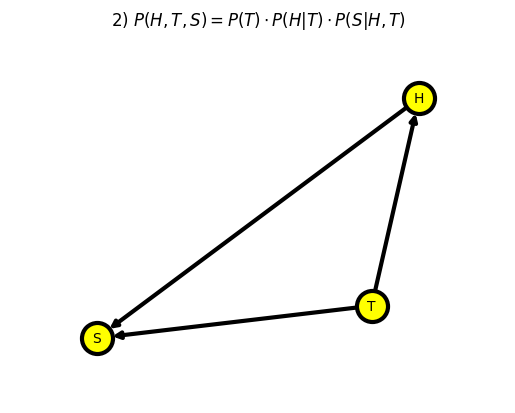

In [134]:
def plot_graph(E, title, node_color, node_size=500):
    nx.draw_networkx(nx.DiGraph(E), font_size=10, node_size=node_size, node_color=node_color, edgecolors="black", linewidths=3, width=3)
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_graph([('H','T'), ('H','S'), ('T','S')], "1) "+r"$P(H,T,S)=P(H) \cdot P(T|H) \cdot P(S|H,T)$", "red")
plot_graph([('T','H'), ('H','S'), ('T','S')], "2) "+r"$P(H,T,S)=P(T) \cdot P(H|T) \cdot P(S|H,T)$", "yellow")

*Чуть отрефакторим таблицу (для удобства).* 

|total| T=0 | T=1  |
| --- |----| --- |
| H=0 | 87 | 270 |
| H=1 | 263 | 80 |  
  
| S=1 | T=0 | T=1  |  
| --- |----| --- |
| H=0 | 81 | 234 |
| H=1 | 192 | 55 |

In [135]:
total = np.array([[87, 270],
                  [263, 80]])
s1 = np.array([[81, 234],
               [192, 55]])
s0 = total - s1

P = {
    "P(H=0)": total[1,:].sum() / total.sum(),
    "P(H=1)": total[0,:].sum() / total.sum(),

    "P(T=0|H=0)": total[0,0] / total[0,:].sum(),
    "P(T=0|H=1)": total[1,0] / total[1,:].sum(),
    "P(T=1|H=0)": total[0,1] / total[0,:].sum(),
    "P(T=1|H=1)": total[1,1] / total[1,:].sum(),

    "P(H=0|T=0)": total[0,0] / total[:,0].sum(),
    "P(H=0|T=1)": total[0,1] / total[:,1].sum(),
    "P(H=1|T=0)": total[1,0] / total[:,0].sum(),
    "P(H=1|T=1)": total[1,1] / total[:,1].sum(),

    "P(S=0|H=0,T=0)": s0[0,0] / total[0,0],
    "P(S=0|H=0,T=1)": s0[0,1] / total[0,1],
    "P(S=0|H=1,T=0)": s0[1,0] / total[1,0],
    "P(S=0|H=1,T=1)": s0[1,1] / total[1,1],

    "P(S=1|H=0,T=0)": s1[0,0] / total[0,0],
    "P(S=1|H=0,T=1)": s1[0,1] / total[0,1],
    "P(S=1|H=1,T=0)": s1[1,0] / total[1,0],
    "P(S=1|H=1,T=1)": s1[1,1] / total[1,1]
}
pd.DataFrame([P]).T.reset_index().rename(columns={'index':'Компонента',0:'Числ.оценка'}).round(3)

,Компонента,Числ.оценка
0,P(H=0),0.490
1,P(H=1),0.510
2,P(T=0|H=0),0.244
3,P(T=0|H=1),0.767
4,P(T=1|H=0),0.756
5,P(T=1|H=1),0.233
6,P(H=0|T=0),0.249
7,P(H=0|T=1),0.771
8,P(H=1|T=0),0.751
9,P(H=1|T=1),0.229


**2.** Сначала все посчитаем ручками. 

* Посчитайте обычную оценку эффекта (ассоциация) между исследуемыми группами (лекарство/плацебо). Сравните с эффектом по группам относительно низкого и высокого давления.


* Посчитайте оценку причинно-следственного эффекта (ATE) с помощью интервенции, поясняя, что означает каждая величина в выражении. 


* Посчитайте оценку причинно-следственного эффекта на экспериментальной группе (ATT) с помощью интервенции, поясняя, что означает каждая величина в выражении. 


* Посчитайте оценку смещения между группами. *См. утверждение с лекции.*

Сделайте выводы.

*Ассоциация*  
$\alpha_T = E(S|T=1)-E(S|T=0) = P(S=1|T=1)-P(S=1|T=0) = ... = 0.046$  
$\alpha_H = E(S|X=1)-E(S|X=0) = P(S=1|X=1)-P(S=1|X=0) = ... = -0.162$

In [136]:
(s1[:,1].sum()/total[:,1].sum() - s1[:,0].sum()/total[:,0].sum()).round(3), \
(s1[1,:].sum()/total[1,:].sum() - s1[0,:].sum()/total[0,:].sum()).round(3)  # расчеты alpha_T, alpha_H

*ATE*   
$ATE_1 = E(S|T:=1)-E(S|T:=0) = \sum_{i=0}^{1}P(S=1|H=i,T=1)P(H=i) - \sum_{i=0}^{1}P(S=1|H=i,T=0)P(H=i) = ... = -0.053$  
$ATE_2 = E(S|T:=1)-E(S|T:=0) = \alpha_T = 0.046$ 

In [137]:
P['P(T=0)'], P['P(T=1)'] = total[:,0].sum()/total.sum(), total[:,1].sum()/total.sum()
((P['P(S=1|H=0,T=1)']*P['P(H=0)']+P['P(S=1|H=1,T=1)']*P['P(H=1)']) - (P['P(S=1|H=0,T=0)']*P['P(H=0)']+P['P(S=1|H=1,T=0)']*P['P(H=1)'])).round(3)  # расчет ATE

*ATT*  
$ATT_1 = P(S=1|H=1,T=1)P(H=1) - P(S=1|H=1,T=0)P(H=1) = ... = -0.022$  
$ATT_2 = ATE_2 = 0.046$ 

In [138]:
(P['P(S=1|H=1,T=1)']*P['P(H=1)'] - P['P(S=1|H=1,T=0)']*P['P(H=1)']).round(3)  # расчет ATT

**3.** Поэкспериментируем с библиотекой DoWhy. Зададим датасет с данными, которые соответствуют нашей задаче

In [139]:
data = pd.DataFrame()   # переименовал столбцы, чтобы сокращения были те же
data['T'] = [0]*(87+263) + [1]*(270+80)  # treatment
data['H'] = [0]*87 + [1]*263 + [0]*270 + [1]*80  # blood_pressure
data['S'] = [1]*81 + [0]*(87-81) + [1]*192 + [0]*(263-192) + [1]*234 + [0]*(270-234) + [1]*55 + [0]*(80-55)  # results
data.index.name = 'patient'
data

,T,H,S
patient,,,
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
695,1,1,0
696,1,1,0
697,1,1,0


Задайте граф причинно-следственных связей и постройте по нему модель `StructuralCausalModel` с автоматическим определением механизма причинно-следственных связей. Обучите полученную модель

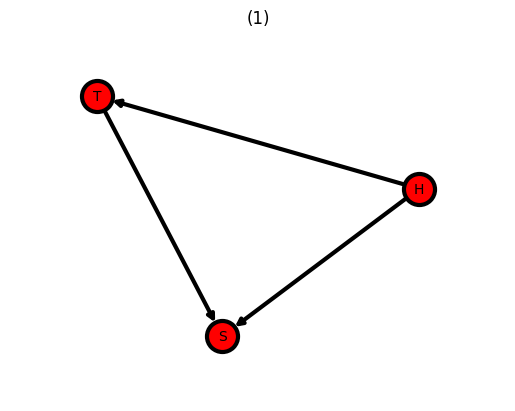

In [140]:
causal_graph = nx.DiGraph([('T','S'),('H','S'),('H','T')])
plot_graph([('T','S'),('H','S'),('H','T')], "(1)", "red")

Выясните, какие зависимости подобрались и напечатайте параметры этих моделей

In [141]:
causal_model = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model, data)
gcm.fit(causal_model, data)

for x in ['T','S']:
    model = causal_model.causal_mechanism(x).prediction_model.sklearn_model
    print(f"{x}:")
    display(model)
    if x == 'S':
        print(f"{model.coef_},  {model.intercept_}")

Fitting causal mechanism of node H: 100%|██████████| 3/3 [00:00<00:00, 112.42it/s]

T:


HistGradientBoostingRegressor()

S:


LinearRegression()

[-0.1903959  -0.05383557],  0.923068918671536


Как видим, были использованы модели с аддитивным шумом, в то время как наши данные дискретны.

Поменяем тип данных на строковые

In [142]:
data = data.astype(str)

Задайте модели наследования вручную. Если у вершины нет предков, то используйте эмпирическое распределение, иначе &mdash; классификатор `gcm.ClassifierFCM()`. Обучите полученную causal модель

In [143]:
causal_model = gcm.StructuralCausalModel(causal_graph)
for x,mech in zip(['H','S','T'],[gcm.EmpiricalDistribution(), gcm.ClassifierFCM(gcm.ml.create_logistic_regression_classifier()), gcm.ClassifierFCM(gcm.ml.create_logistic_regression_classifier())]):
    causal_model.set_causal_mechanism(x, mech)
gcm.fit(causal_model, data)

Fitting causal mechanism of node H: 100%|██████████| 3/3 [00:00<00:00, 191.70it/s]


Наконец, посчитайте оценку ATE с помощью интервенции в построенной модели. Не забудьте, что в качестве значения интервенции нужно указать строку, а полученные семплы перевести обратно в числа перед усреднением.

In [144]:
(gcm.interventional_samples(causal_model, {'T':lambda _:1}, num_samples_to_draw=100000)['S'].astype('int') - gcm.interventional_samples(causal_model, {'T':lambda _:0}, num_samples_to_draw=100000)['S'].astype('int')).mean()

Сравните результаты с теми, которые посчитали ручками

*+- так же. Но вручную ,конечно, очень легко запутаться в индексах (даже на такой тренировочной задаче)*

---

### Задача 2.

**1.** Рассмотрим данные по заболеваемости и смертности от COVID-19 в марте 2020 года когда пандемия только начиналась. В данных представлена информация по нескольким странам по разным возрастным категориям. 

Считайте данные и посчитайте Case Fatality Rate (CFR) &mdash; процент смертности при условии подтвержденного коронавируса

In [145]:
df = pd.read_excel('covid_data.xlsx').drop('Unnamed: 0', axis=1)
df = df[df['Country'].isin(['Italy','China'])]
df['cfr'] = df['Confirmed fatalities'] / df['Confirmed cases']
df

,Country,Age group,Confirmed cases,Confirmed fatalities,cfr
0,Italy,0-9,43,0,0.000000
1,Italy,10-19,85,0,0.000000
2,Italy,20-29,296,0,0.000000
3,Italy,30-39,470,0,0.000000
4,Italy,40-49,891,1,0.001122
5,Italy,50-59,1453,3,0.002065
6,Italy,60-69,1471,37,0.025153
7,Italy,70-79,1785,114,0.063866
8,Italy,80+,1532,202,0.131854
18,China,0-9,416,0,0.000000


Будем рассматривать Китай и Италию как довольно разные страны, в которых коронавирус в начале 2020 развивался наиболее стремительно.

Постройте гистограмму для сравнения CFR двух стран по возрастным категориям. Используйте для этого один вызов `seaborn.barplot` с некоторыми параметрами.

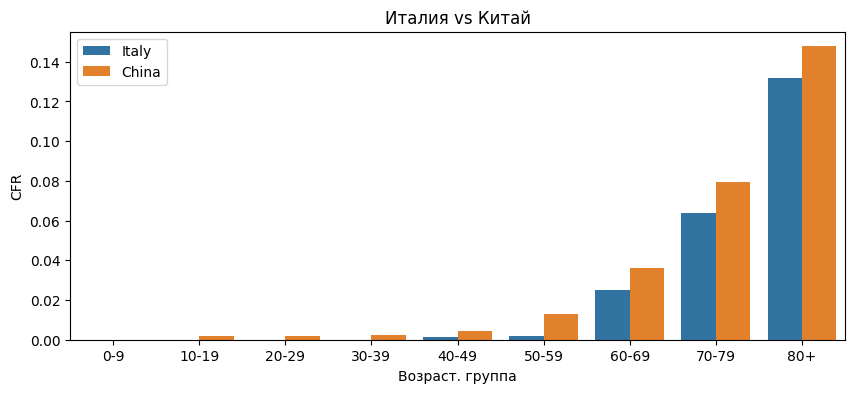

In [146]:
plt.figure(figsize=(10,4))
sns.barplot(x='Age group', y='cfr', hue='Country', data=df)
plt.xlabel('Возраст. группа')
plt.ylabel('CFR')
plt.title('Италия vs Китай')
plt.legend()
plt.show()

*В Китае во всех возрастных группах cfr выше*

Теперь посчитайте общую CFR на основе суммарного количества случаев по всем категориями и сравните их для этих двух стран.

In [147]:
gb = df.groupby('Country')[['Confirmed fatalities','Confirmed cases']].sum()
gb['cfr'] = gb['Confirmed fatalities'] / gb['Confirmed cases']
gb

,Confirmed fatalities,Confirmed cases,cfr
Country,,,
China,1023,44672,0.02290
Italy,357,8026,0.04448


*Теперь - наоборот, в Китае общая cfr стала ниже*

Что можно наблюдать?

*Парадокс Симпсона*

**2.** Итак, мы исследуем три признака: страна, возрастная категория, CFR. Определите на них граф причинно-следственных связей на основе логических соображений и визуализируйте его.

*Страна (например, законы\меры) вляют на cfr, возраст вляет на cfr*

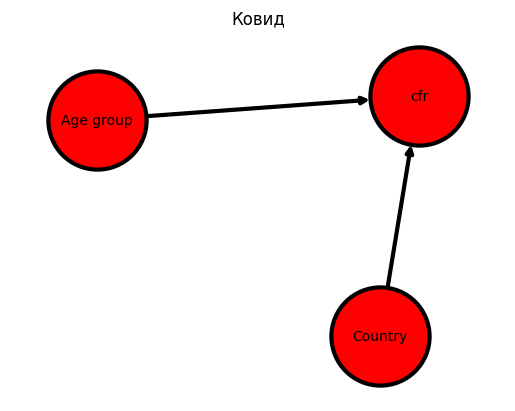

In [148]:
causal_graph = nx.DiGraph([('Country','cfr'),('Age group','cfr')])
plot_graph([('Country','cfr'),('Age group','cfr')], "Ковид", "red", node_size=5000)

Для каждой вершины опишите характер причинно-следственной связи. Например, если это линейная регрессия, то надо выписать ее формулу.

*Лин.рег.*

**3.** Сделаем две копии признака "страна":
* `demography` ($D$) &mdash; демографическая ситуация, определяемая страной;
* `treatment methods` ($T$) &mdash; методы лечения, свойственные стране.

Мы делаем такое разделение потому как, например, одна страна может взять методы лечения другой страны, но демографическую ситуацию поменять при этом не получится.

Получается следующий причинно-следственный граф. Визуализируйте его

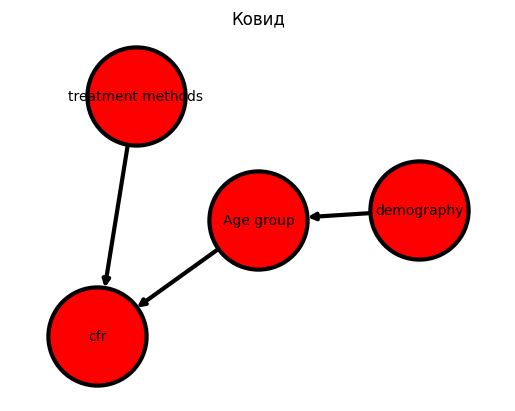

In [154]:
df['demography'], df['treatment methods'] = df['Country'], df['Country']  # копии
causal_graph = nx.DiGraph([('demography', 'Age group'), ('treatment methods', 'cfr'), ('Age group', 'cfr')])
plot_graph([('demography', 'Age group'), ('treatment methods', 'cfr'), ('Age group', 'cfr')], "Ковид", "red", node_size=5000)

Определите по графу causal модель и обучите ее

In [150]:
causal_model = gcm.StructuralCausalModel(causal_graph)
for x,mech in zip(['demography','treatment methods','Age group','cfr'], [*[gcm.EmpiricalDistribution() for _ in range(2)], \
 gcm.ClassifierFCM(gcm.ml.create_logistic_regression_classifier()), gcm.AdditiveNoiseModel(gcm.ml.create_elastic_net_regressor())]):
    causal_model.set_causal_mechanism(x, mech)
gcm.fit(causal_model, df)

Fitting causal mechanism of node cfr: 100%|██████████| 4/4 [00:00<00:00, 111.34it/s]     


С помощью интервенции оцените, было бы эффективнее применять в Китае с его демографической ситуацией итальянские методы лечения. Для этого нужно оценить величину
$$NDE = \mathsf{E}(CFR\ |\ D:=China, T:=Italy) - \mathsf{E}(CFR\ |\ D:=China, T:=China),$$
где NDE &mdash; Natural Direct Effect. Используйте достаточно большое количество семплирований.

Теперь, наоборот, оцените, было бы эффективнее применять в Италии с его демографической ситуацией китайские методы лечения.

Наконец, оценим, что было бы если в Китае с его методами лечения демографическая ситуация была бы такой же, как в Италии (Natural Indirect Effect). Какую величину при этом надо посчитать? Посчитайте ее.

Сделайте выводы.

**4.** Наконец, сравните между собой некоторые другие страны. Каким странам вы рекомендовали бы поменять методы лечения на начальном этапе?

---

### Задача 3.

Случайный вектор $V = (X, Y, Z)$ определяется следующим образом
	$$X = \varepsilon_1,$$
	$$Y = \alpha X + \varepsilon_2,$$
	$$Z = \beta Y + \gamma X + \varepsilon_3,$$
	где $(\varepsilon_1, \varepsilon_2, \varepsilon_3) \sim \mathcal{N}(0, I_3)$.

Нарисуйте граф причинно-следственных связей, соответствующий данной модели. Выпишите плотность вектора $V$.

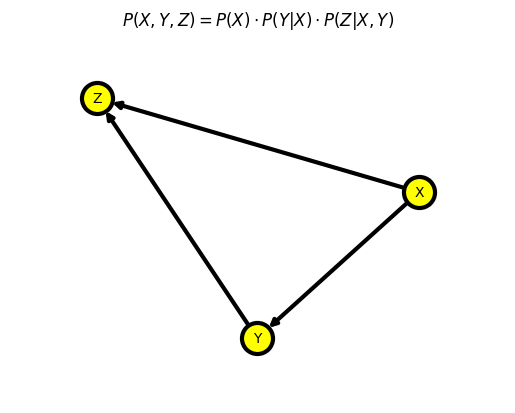

In [151]:
plot_graph([('X','Y'),('X','Z'),('Y','Z')], r"$P(X,Y,Z)=P(X) \cdot P(Y|X) \cdot P(Z|X,Y)$", "yellow")

Посчитайте $\rho$ &mdash; корреляцию между $Y$ и $Z$. 

*Указание*: воспользуйтесь аддитивностью параметра сдвига.

$X = \varepsilon_1, Y = \alpha X + \varepsilon_2, Z = \beta Y + \gamma X + \varepsilon_3$, подставим: $Y = \alpha \varepsilon_1 + \varepsilon_2, Z = \beta (\alpha \varepsilon_1 + \varepsilon_2) + \gamma \varepsilon_1 + \varepsilon_3 = (\alpha \beta + \gamma) \varepsilon_1 + \beta \varepsilon_2 + \varepsilon_3$  
$\rho = \frac{cov(Y,Z)}{\sqrt{DYDZ}} = \frac{\alpha (\alpha \beta + \gamma)D \varepsilon_1 + \beta D \varepsilon_2}{\sqrt{(\alpha^2 D \varepsilon_1 + D \varepsilon_2)((\alpha \beta + \gamma)^2 D \varepsilon_1 + \beta^2 D \varepsilon_2 + D \varepsilon_3)}} = \frac{\alpha^2 \beta + \gamma \alpha + \beta}{(\alpha^2 + 1)((\alpha \beta + \gamma)^2 + \beta^2 + 1)}$

Предположим, что величина $X$ не наблюдаема. Можно ли утверждать, что $Y$ влечет $Z$, если $\rho\not=0$?

*Нет. Например, при $\alpha=1, \beta=0, \gamma=1$ имеем $\rho=1/2$, но множитель при Y равен 0, т.е. $X \rightarrow Z, X \rightarrow Y, \rho \neq 0, Y \cancel{\rightarrow} Z$*

Ответьте на предыдущий вопрос, если известно, что $\alpha=0$.

*Теперь да. Тогда для $\rho \neq 0$ надо $\beta \neq 0$, то есть $Y \rightarrow Z$*

---

### Задача 4.

В условиях предыдущей задачи посчитайте $\mathsf{E} (Z | Y=y)$ и $\mathsf{E} (Z | Y:=y)$. Сравните результаты между собой, построив несколько графиков для разных значений $y$ и параметров $\alpha, \beta, \gamma$.

*Указания.*
Теоретические вычисления могут быть довольно затруднительными, хотя довести их до конца вполне реально. В таком случае воспользуйтесь численными методами. Перебрав несколько вариантов численными методам можно получить полный балл за задачу.
1. Для $\mathsf{E} (Z | Y=y)$ можно свести ответ к интегралу, который посчитать методом Монте-Карло.
2. Для $\mathsf{E} (Z | Y:=y)$ можно сразу выполнить простое семплирование при интервенции.

$E(Z|Y=y) = \int\limits_{\mathbb{R}} t p(Z=t | Y=y)dt$, где $p(Z=t | Y=y) = p((\alpha\beta + \gamma)\varepsilon_1 + \beta\varepsilon_2+\varepsilon_3 = t | \alpha\varepsilon_1 + \varepsilon_2 = y) = /$ $y_1 = \alpha\varepsilon_1 + \varepsilon_2$, $y_2=\alpha \varepsilon_2 - \varepsilon_1$ - независ.$ / = p(y_1(\beta + \frac{\alpha\gamma}{\alpha^2+1}) - \frac{y_2 \gamma}{\alpha^2+1} + \varepsilon_3 = t | y_1 = y) = p(-\frac{y_2 \gamma}{\alpha^2+1} + \varepsilon_3 = t -y(\beta + \frac{\alpha\gamma}{\alpha^2+1})| y_1 = y) = p(-\frac{y_2 \gamma}{\alpha^2+1} + \varepsilon_3 = t -y(\beta + \frac{\alpha\gamma}{\alpha^2+1})) = / \varepsilon_3 \sim N(\frac{y_2 \gamma}{\alpha^2+1}, 1 + \frac{\gamma^2}{(1+\alpha^2)})/ = p(\xi = t)$, где $\xi \sim N(y(\beta + \frac{\alpha\gamma}{\alpha^2+1}), 1 + \frac{\gamma^2}{(1+\alpha^2)})$  
$E(Z|Y:=y) = E(\beta y + \gamma \varepsilon_1 + \varepsilon_3 | \alpha \varepsilon_1 + \varepsilon_2 := y) = \beta y + E(\gamma \varepsilon_1 | \alpha \varepsilon_1 + \varepsilon_2 := y) = \beta y + E(\frac{\gamma}{\alpha}(y - \varepsilon_2)) = (\beta + \frac{\gamma}{\alpha})y$

In [152]:
y, a, b, g = 0, 0.5, 0.5, 0.5
(sps.norm(y*(b+a*g/(a**2+1)), 1+g**2/(a**2+1)).pdf(sps.uniform(-100,100).rvs(10**5))).mean() * 200  # интеграл пл-ти близок к 1, всё ок

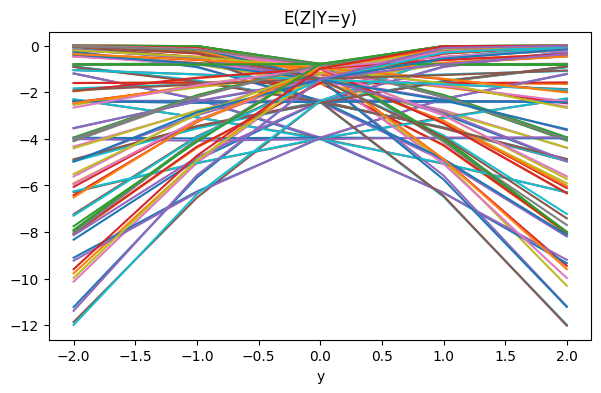

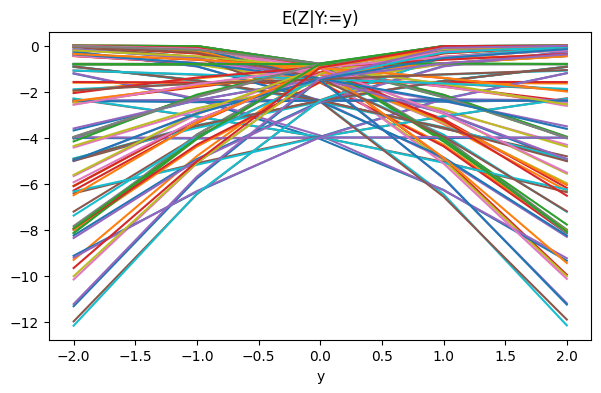

In [155]:
y,A,B,G = [np.array([-2,-1,0,1,2]) for _ in range(4)]
for title in ['E(Z|Y=y)', 'E(Z|Y:=y)']:
    plt.figure(figsize=(7,4))
    plt.title(title)
    plt.xlabel('y')
    for a in A:
        for b in B:
            for g in G:
                points = sps.uniform(-100,100).rvs(size=(10**5, len(y)))
                plt.plot(y, (sps.norm(y*(b+a*g/(a**2+1)), 1+g**2/(a**2+1)).pdf(points) * points).mean(axis=0) * 200)
    plt.show()

*Вывод: графики прикольные, но каких-то глубоких выводов сделать не удалось*